In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import missingno as msno
import math
from matplotlib.gridspec import GridSpec


# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom # This is for the unsupervised clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [43]:
df = pd.read_csv("data\\peak\\df_less_99th_filtered.csv")

In [44]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month,KWH/hh_group
0,2013-01-01 00:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,48.02,January,< 99th per
1,2013-01-01 00:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.84,January,< 99th per
2,2013-01-01 01:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.66,January,< 99th per
3,2013-01-01 01:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.39,January,< 99th per
4,2013-01-01 02:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.12,January,< 99th per
...,...,...,...,...,...,...,...,...,...,...
5994775,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January,< 99th per
5994776,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January,< 99th per
5994777,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January,< 99th per
5994778,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January,< 99th per


In [45]:
df['DateTime'] = pd.to_datetime(df['DateTime']) # convert to datetime datetype

In [46]:
gb1 = df.groupby(['Acorn_grouped', 'stdorToU']) # group by to do more EDA.
groups = dict(list(gb1)) # makes a dict of dataframs which can be accesed below. 

In [47]:

(gb1.size()/17580).round(0) # how many series belong to each group.

Acorn_grouped  stdorToU
Adversity      Std         112.0
               ToU          33.0
Affluent       Std          83.0
               ToU          29.0
Comfortable    Std          58.0
               ToU          26.0
dtype: float64

In [48]:
gb1.describe().round(3) # 5 number summary.

KWH/hh                                          \
                            count   mean    std  min    25%    50%    75%   
Acorn_grouped stdorToU                                                      
Adversity     Std       1968960.0  0.121  0.123  0.0  0.044  0.085  0.156   
              ToU        580140.0  0.111  0.128  0.0  0.038  0.072  0.136   
Affluent      Std       1459140.0  0.103  0.113  0.0  0.035  0.069  0.133   
              ToU        509820.0  0.106  0.118  0.0  0.037  0.064  0.131   
Comfortable   Std       1019640.0  0.113  0.115  0.0  0.041  0.079  0.146   
              ToU        457080.0  0.107  0.114  0.0  0.039  0.073  0.134   

                              air_temperature                                \
                          max           count    mean     std    min    25%   
Acorn_grouped stdorToU                                                        
Adversity     Std       1.559       1968960.0  51.681  12.046  24.44  42.44   
              ToU       1.540        580140.0  51.681  12.046  24.44  42.44   
Affluent      Std       1.552       1459140.0  51.681  12.046  24.44  42.44   
              ToU       1.540        509820.0  51.681  12.046  24.44  42.44   
Comfortable   Std       1.557       1019640.0  51.681  12.046  24.44  42.44   
              ToU       1.539        457080.0  51.681  12.046  24.44  42.44   

                                              
                           50%    75%    max  
Acorn_grouped stdorToU                        
Adversity     Std       50.945  60.44  92.66  
              ToU       50.945  60.44  92.66  
Affluent      Std       50.945  60.44  92.66  
              ToU       50.945  60.44  92.66  
Comfortable   Std       50.945  60.44  92.66  
              ToU       50.945  60.44  92.66

In [49]:
Adversity_Std = groups['Adversity', 'Std']
Adversity_ToU = groups['Adversity', 'ToU']
Affluent_Std = groups['Affluent', 'Std']
Affluent_ToU = groups['Affluent', 'ToU']
Comfortable_Std = groups['Comfortable', 'Std']
Comfortable_ToU = groups['Comfortable', 'ToU']

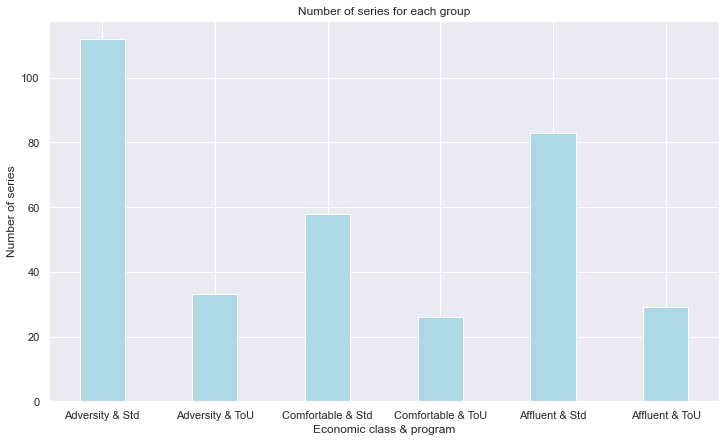

In [50]:
# creating the dataset
group = ['Adversity & Std', 'Adversity & ToU', 'Comfortable & Std', 'Comfortable & ToU',
         'Affluent & Std', 'Affluent & ToU',]
mean = [112, 33, 58, 26, 83, 29] # check these numbers.
   
fig = plt.figure(figsize = (12, 7))
 
# creating the bar plot
plt.bar(group, mean, color ='lightblue',
        width = 0.4)
 
plt.xlabel("Economic class & program")
plt.ylabel("Number of series")
plt.title("Number of series for each group")
plt.show()

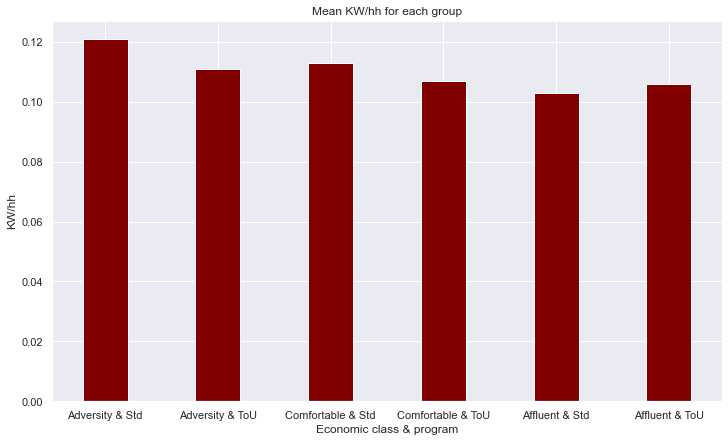

In [51]:
# creating the dataset
group = ['Adversity & Std', 'Adversity & ToU', 'Comfortable & Std', 'Comfortable & ToU',
         'Affluent & Std', 'Affluent & ToU',]
mean = [0.121, 0.111, 0.113, 0.107, 0.103, 0.106] # check these numbers.
   
fig = plt.figure(figsize = (12, 7))
 
# creating the bar plot
plt.bar(group, mean, color ='maroon',
        width = 0.4)
 
plt.xlabel("Economic class & program")
plt.ylabel("KW/hh")
plt.title("Mean KW/hh for each group")
plt.show()

In [11]:
gb2 = df.groupby(['Acorn_grouped', 'Month', 'Day']).mean() # group by to do more EDA.
df2 = pd.DataFrame(gb2) # Put gb in df.

In [12]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19654440 entries, 0 to 19654439
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DateTime         datetime64[ns]
 1   LCLid            object        
 2   stdorToU         object        
 3   KWH/hh           float64       
 4   Acorn            object        
 5   Acorn_grouped    object        
 6   Day              object        
 7   air_temperature  float64       
 8   Month            object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.3+ GB


In [13]:
df.describe().round(2)

,KWH/hh,air_temperature
count,19654440.00,19654440.00
mean,0.22,51.68
std,0.31,12.05
min,0.00,24.44
25%,0.06,42.44
50%,0.12,50.99
75%,0.24,60.44
max,9.14,92.66


In [12]:
sns.set(rc = {'figure.figsize':(18,12)})

<AxesSubplot:>

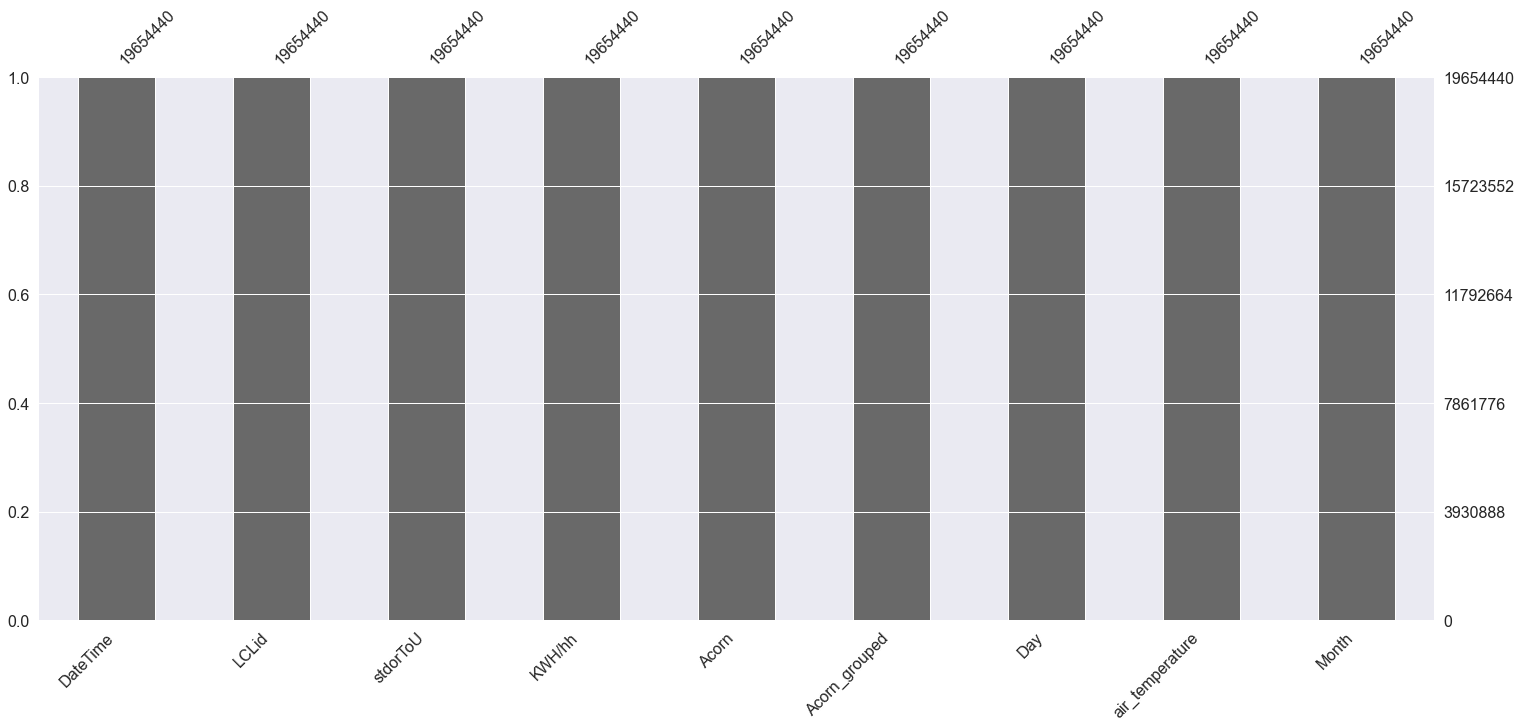

In [15]:
msno.bar(df)

In [52]:
gb3 = df.groupby(['Acorn_grouped', 'Month']).mean() # group by to do more EDA.
df3 = pd.DataFrame(gb3) # Put gb in df.

In [53]:
df3

KWH/hh  air_temperature
Acorn_grouped Month                               
Adversity     April      0.119172        47.556697
              August     0.104867        65.831659
              December   0.129467        44.900101
              February   0.132816        38.783859
              January    0.132532        40.243401
              July       0.107214        69.265198
              June       0.106000        59.791763
              March      0.131516        38.838489
              May        0.109825        53.245500
              November   0.125977        45.544719
              October    0.117602        56.331007
              September  0.110318        59.129223
Affluent      April      0.102047        47.556697
              August     0.091270        65.831659
              December   0.112060        44.900101
              February   0.117571        38.783859
              January    0.121560        40.243395
              July       0.093008        69.265198
              June       0.091832        59.791763
              March      0.114354        38.838489
              May        0.093458        53.245500
              November   0.110032        45.544719
              October    0.101673        56.331007
              September  0.098489        59.129223
Comfortable   April      0.108487        47.556697
              August     0.101772        65.831659
              December   0.120110        44.900101
              February   0.122024        38.783859
              January    0.125850        40.243403
              July       0.103455        69.265198
              June       0.101245        59.791763
              March      0.119250        38.838489
              May        0.103261        53.245500
              November   0.117001        45.544719
              October    0.110107        56.331007
              September  0.102113        59.129223

In [56]:
Adversity_kh_per_month = [0.110318, 0.132816, 0.131516, 0.119172, 0.109825, 0.106000, 0.107214,
                          0.104867, 0.110318, 0.117602, 0.125977, 0.129467]

Comfortable_kh_per_month = [0.125850, 0.122024, 0.119250, 0.108487, 0.103261, 0.101245, 0.103455, 
                            0.10177, 0.102113, 0.110107, 0.117001, 0.120110]

Affluent_kh_per_month = [0.121560, 0.117571, 0.114354, 0.102047, 0.0934458, 0.091832, 0.093008, 
                         0.0912270, 0.098489, 0.101673, 0.110032, 0.112060]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
temp = [40.243402/100.0, 38.783859/100.0, 38.838489/100.0, 47.556697/100.0, 53.245500/100.0, 59.791763/100.0, 69.265198/100.0, 
        65.831659/100.0, 59.129223/100.0, 56.331007/100.0, 45.544719/100.0, 44.900098/100.0]

In [10]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

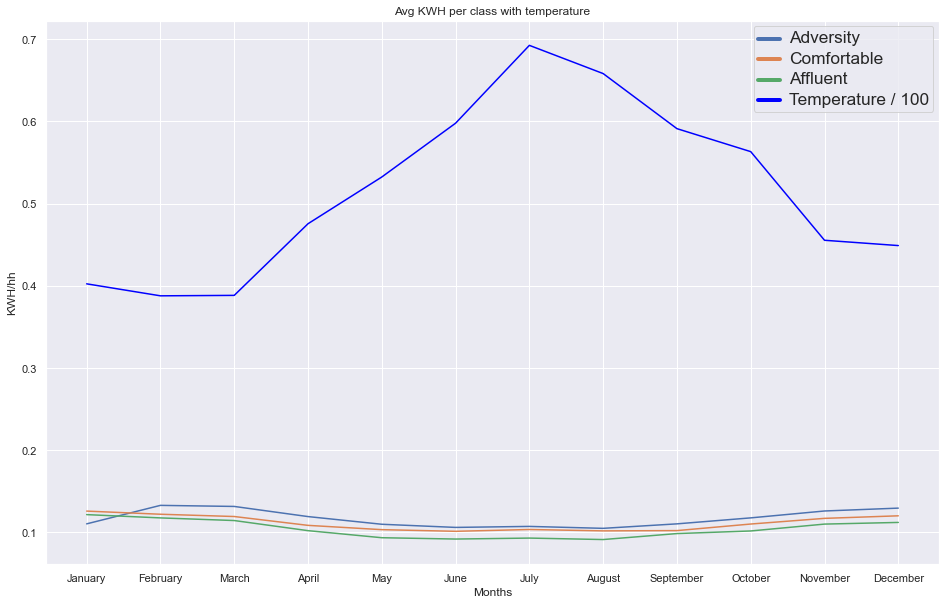

In [57]:
plt.figure(figsize=(16, 10))
# plot lines

plt.plot(months, Adversity_kh_per_month, label = "Adversity")
plt.plot(months, Comfortable_kh_per_month, label = "Comfortable")
plt.plot(months, Affluent_kh_per_month, label = "Affluent")
plt.plot(months, temp, label = "Temperature / 100", color="Blue")

# Add title and axis names
plt.title('Avg KWH per class with temperature')
plt.ylabel('KWH/hh')
plt.xlabel('Months')

leg = plt.legend()
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')

plt.show()

In [21]:
gb4 = df.groupby(['Acorn_grouped', 'Day']).mean() # group by to do more EDA.
df4 = pd.DataFrame(gb4) # Put gb in df.

In [22]:
df4

KWH/hh  air_temperature
Acorn_grouped Day                                 
Adversity     Friday     0.180237        52.104600
              Monday     0.183257        51.996249
              Saturday   0.185384        51.191293
              Sunday     0.194941        51.422454
              Thursday   0.179455        51.934856
              Tuesday    0.180226        51.483037
              Wednesday  0.181333        51.637674
Affluent      Friday     0.241896        52.104602
              Monday     0.244449        51.996249
              Saturday   0.247050        51.191293
              Sunday     0.256672        51.422454
              Thursday   0.239783        51.934845
              Tuesday    0.242321        51.483026
              Wednesday  0.240721        51.637674
Comfortable   Friday     0.215364        52.104619
              Monday     0.216949        51.996249
              Saturday   0.222041        51.191293
              Sunday     0.232805        51.422454
              Thursday   0.211564        51.934856
              Tuesday    0.213698        51.483037
              Wednesday  0.214214        51.637685

In [58]:
gb5 = df.groupby(['Acorn_grouped', 'Day']).mean() # group by to do more EDA.
df5 = pd.DataFrame(gb5) # Put gb in df.

In [59]:
df5

KWH/hh  air_temperature
Acorn_grouped Day                                 
Adversity     Friday     0.117674        52.104602
              Monday     0.118000        51.996249
              Saturday   0.120011        51.191293
              Sunday     0.124243        51.422454
              Thursday   0.116792        51.934856
              Tuesday    0.117313        51.483037
              Wednesday  0.118341        51.637674
Affluent      Friday     0.102840        52.104602
              Monday     0.102783        51.996249
              Saturday   0.106073        51.191293
              Sunday     0.109554        51.422454
              Thursday   0.101216        51.934856
              Tuesday    0.102667        51.483037
              Wednesday  0.102354        51.637670
Comfortable   Friday     0.109574        52.104602
              Monday     0.111360        51.996249
              Saturday   0.113301        51.191293
              Sunday     0.116100        51.422454
              Thursday   0.109147        51.934856
              Tuesday    0.109942        51.483037
              Wednesday  0.109165        51.637675

In [60]:
Adversity_kh_per_day = [0.118000, 0.117313, 0.118341, 0.116792, 0.117674, 0.120011, 0.124243]

Comfortable_kh_per_day = [0.1113, 0.109942, 0.109165, 0.109147, 0.109574, 0.113301, 0.116100]

Affluent_kh_per_day = [0.102783, 0.102667, 0.102354, 0.101216, 0.102840, 0.106073, 0.109554]
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


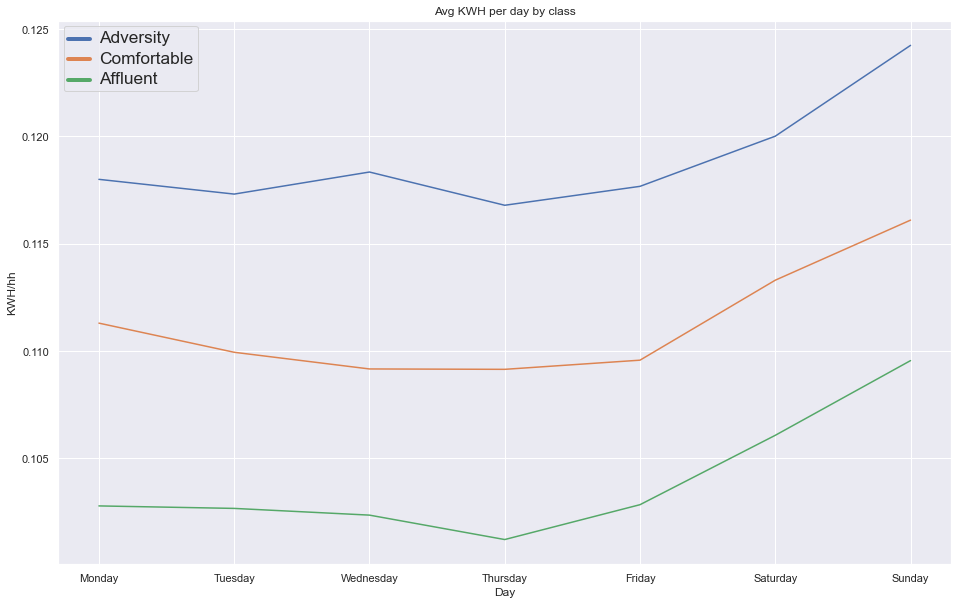

In [61]:
plt.figure(figsize=(16, 10))
# plot lines

plt.plot(day, Adversity_kh_per_day, label = "Adversity")
plt.plot(day, Comfortable_kh_per_day, label = "Comfortable")
plt.plot(day, Affluent_kh_per_day, label = "Affluent")

# Add title and axis names
plt.title('Avg KWH per day by class')
plt.ylabel('KWH/hh')
plt.xlabel('Day')

leg = plt.legend()
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=4)
plt.setp(leg_texts, fontsize='x-large')

plt.show()

In [ ]:
# try to figure when the 4th quartile enrgy use is.
# on-peak hours that generally refer to the hours beginning at 7:00 a.m. 
# until #11:00 p.m. on weekdays, and off-peak hours that are between 11:00 p.m. 
# and 7:00 a.m. on weekdays and all day on Saturdays, Sundays, and holidays.

# https://www.eia.gov/todayinenergy/detail.php?id=42915

In [28]:
peak_df = df[df['KWH/hh'] > .3]

In [36]:
peak_df.describe().round(3)

,KWH/hh,air_temperature
count,3808735.000,3808735.000
mean,0.668,49.975
std,0.479,11.835
min,0.301,24.440
25%,0.374,40.640
50%,0.503,48.740
75%,0.776,58.460
max,9.141,92.660


In [29]:
peak_df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
24,2013-01-01 12:00:00,MAC000002,Std,0.794,ACORN-A,Affluent,Tuesday,44.60,January
25,2013-01-01 12:30:00,MAC000002,Std,0.507,ACORN-A,Affluent,Tuesday,45.05,January
28,2013-01-01 14:00:00,MAC000002,Std,0.308,ACORN-A,Affluent,Tuesday,46.04,January
34,2013-01-01 17:00:00,MAC000002,Std,0.327,ACORN-A,Affluent,Tuesday,43.88,January
40,2013-01-01 20:00:00,MAC000002,Std,0.886,ACORN-A,Affluent,Tuesday,42.08,January
...,...,...,...,...,...,...,...,...,...
19654431,2014-01-01 19:30:00,MAC004219,Std,0.424,ACORN-E,Affluent,Wednesday,42.80,January
19654432,2014-01-01 20:00:00,MAC004219,Std,0.316,ACORN-E,Affluent,Wednesday,42.80,January
19654433,2014-01-01 20:30:00,MAC004219,Std,0.344,ACORN-E,Affluent,Wednesday,42.80,January
19654434,2014-01-01 21:00:00,MAC004219,Std,0.419,ACORN-E,Affluent,Wednesday,42.80,January


In [30]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
0,2013-01-01 00:00:00,MAC000002,Std,0.219,ACORN-A,Affluent,Tuesday,48.02,January
1,2013-01-01 00:30:00,MAC000002,Std,0.241,ACORN-A,Affluent,Tuesday,47.84,January
2,2013-01-01 01:00:00,MAC000002,Std,0.191,ACORN-A,Affluent,Tuesday,47.66,January
3,2013-01-01 01:30:00,MAC000002,Std,0.235,ACORN-A,Affluent,Tuesday,47.39,January
4,2013-01-01 02:00:00,MAC000002,Std,0.182,ACORN-A,Affluent,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19654435,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January
19654436,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January
19654437,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January
19654438,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January


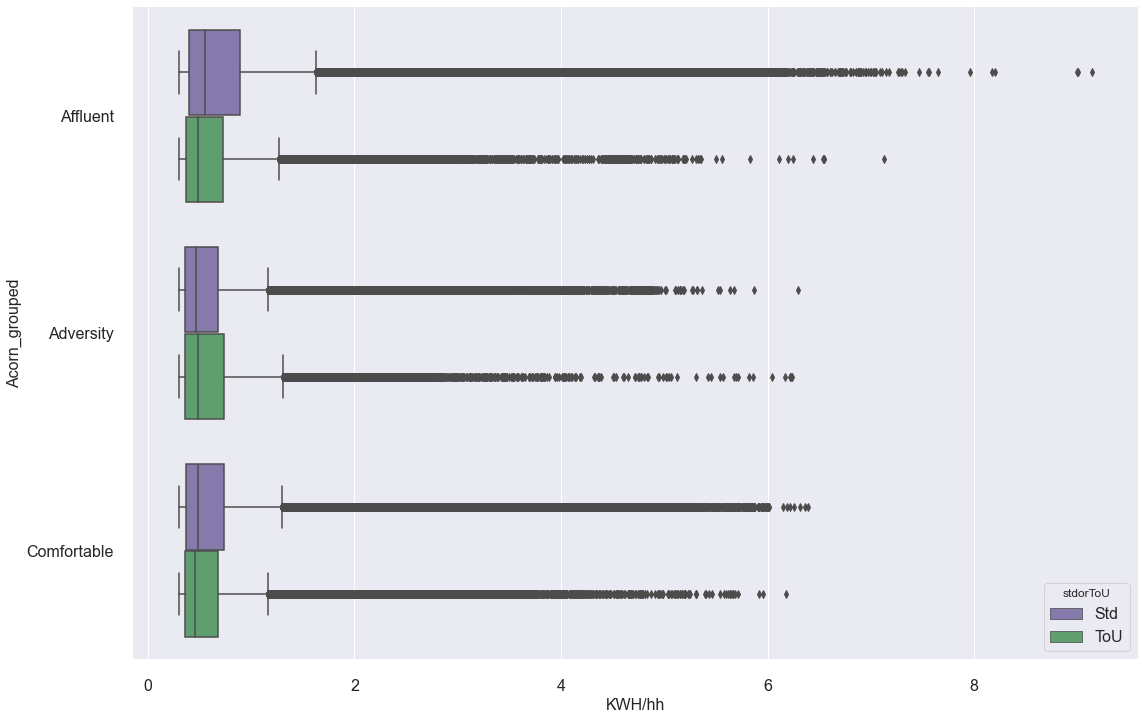

In [33]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="stdorToU", palette=["m", "g", "b"],
            data=peak_df) 
sns.despine(offset=10, trim=True)

In [32]:
3808735 / 19654440 # % of rows above the 75th Percentile

0.19378496665384515

In [170]:
MAC000002_df = df[df['LCLid'] == 'MAC000002']
MAC004208_df = df[df['LCLid'] == 'MAC004208']

In [138]:
MAC000002_df.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\MAC000002_df.csv", index = False) # full dataset

In [137]:
MAC000010_df.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\MAC000010_df.csv", index = False) # full dataset

<AxesSubplot:>

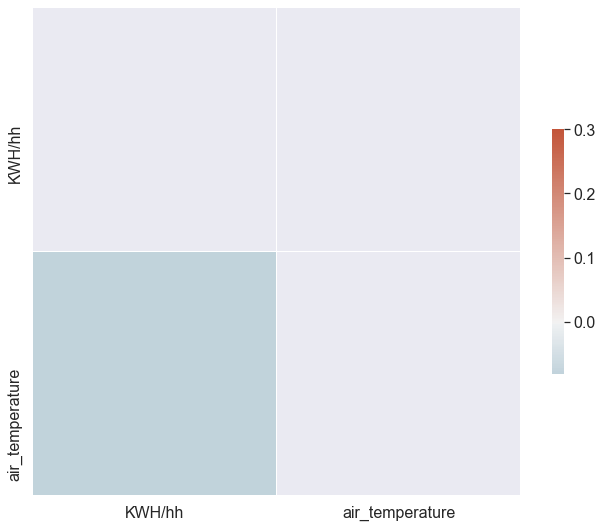

In [139]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

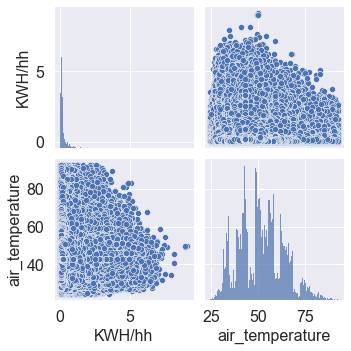

In [140]:
# Basic correlogram
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='KWH/hh', ylabel='Acorn_grouped'>

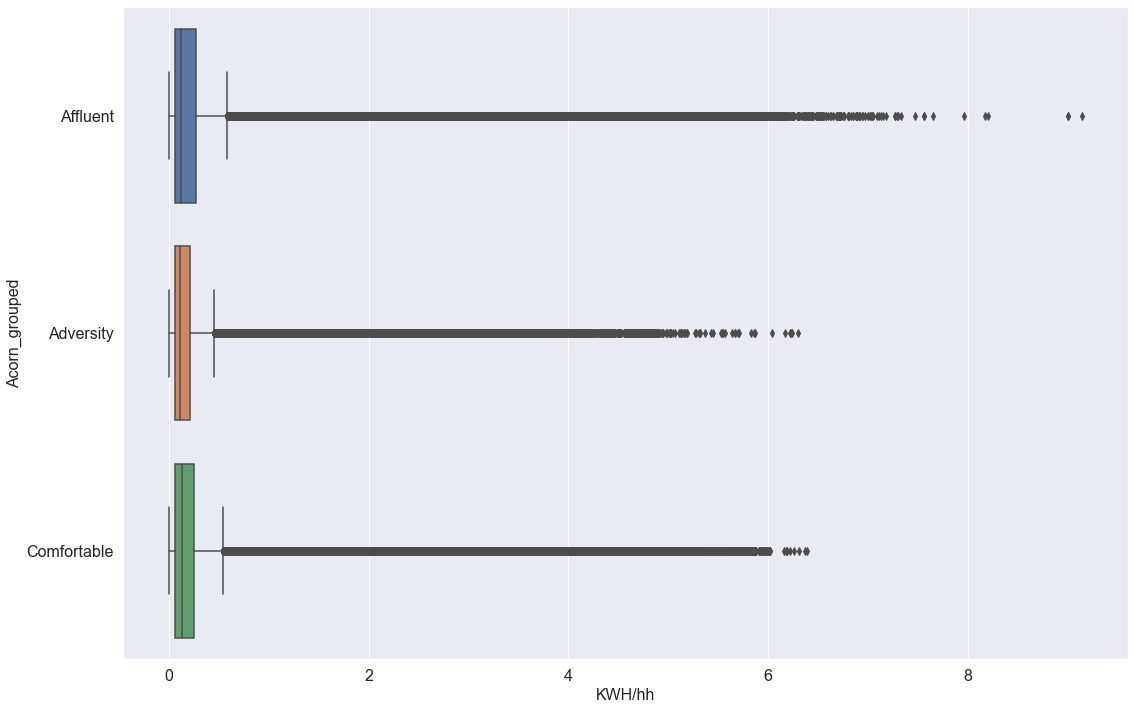

In [141]:
sns.boxplot(x='KWH/hh',y='Acorn_grouped',data=df)

In [169]:
Adversity_Std

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
17580,2013-01-01 00:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,48.02,January
17581,2013-01-01 00:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.84,January
17582,2013-01-01 01:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.66,January
17583,2013-01-01 01:30:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.39,January
17584,2013-01-01 02:00:00,MAC000006,Std,0.000,ACORN-Q,Adversity,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19601695,2014-01-01 21:30:00,MAC004208,Std,0.739,ACORN-Q,Adversity,Wednesday,42.80,January
19601696,2014-01-01 22:00:00,MAC004208,Std,0.485,ACORN-Q,Adversity,Wednesday,42.80,January
19601697,2014-01-01 22:30:00,MAC004208,Std,0.520,ACORN-Q,Adversity,Wednesday,42.80,January
19601698,2014-01-01 23:00:00,MAC004208,Std,0.390,ACORN-Q,Adversity,Wednesday,42.80,January


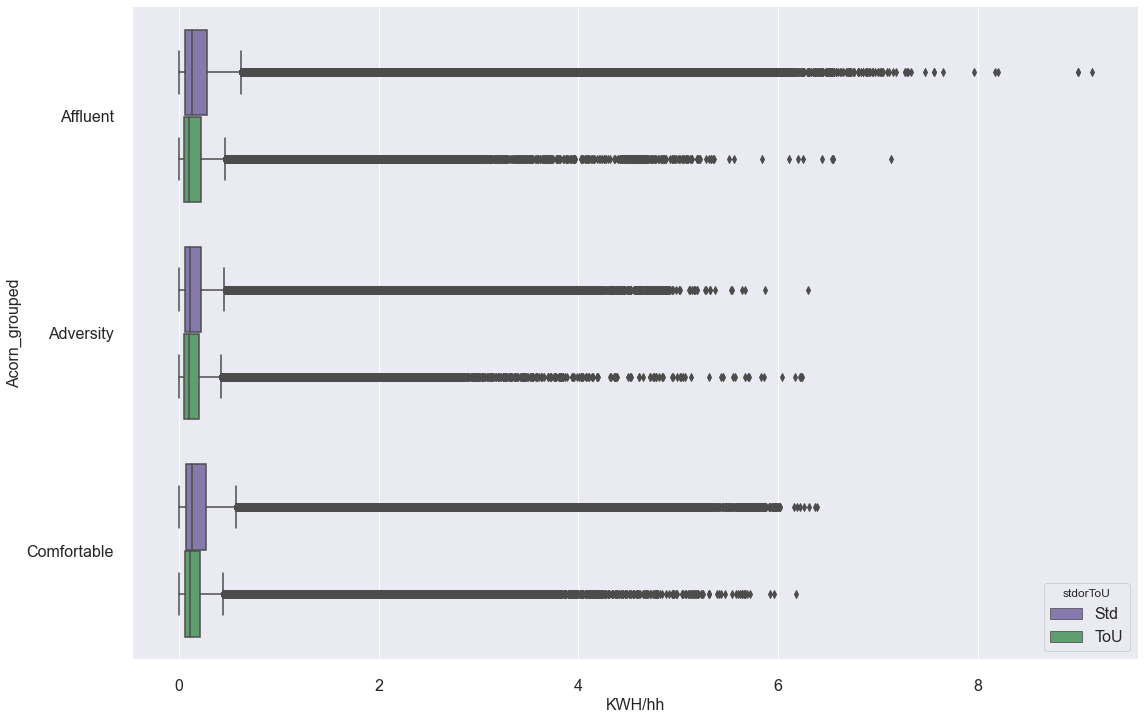

In [176]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="stdorToU", palette=["m", "g", "b"],
            data=df) 
sns.despine(offset=10, trim=True)

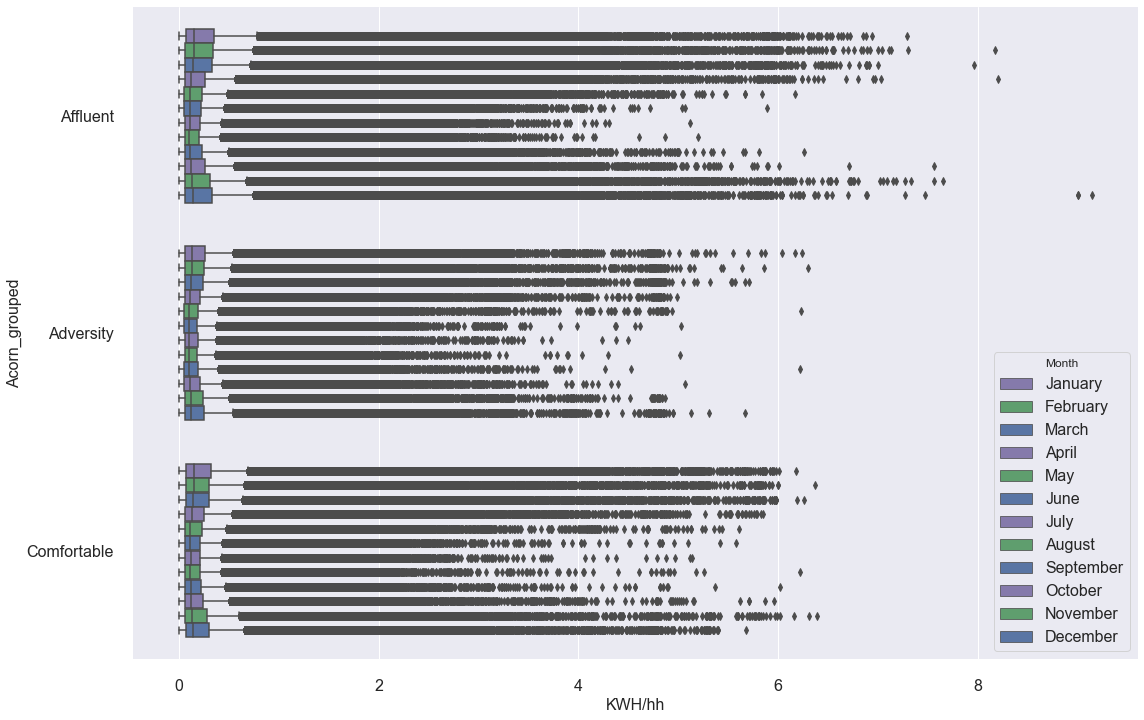

In [175]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="Month", palette=["m", "g", "b"],
            data=df) 
sns.despine(offset=10, trim=True)

In [183]:
rslt_df = df[df['KWH/hh'] > 1] 
rslt_df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
80,2013-01-02 16:00:00,MAC000002,Std,1.078,ACORN-A,Affluent,Wednesday,48.20,January
137,2013-01-03 20:30:00,MAC000002,Std,1.098,ACORN-A,Affluent,Thursday,51.71,January
230,2013-01-05 19:00:00,MAC000002,Std,1.181,ACORN-A,Affluent,Saturday,50.72,January
280,2013-01-06 20:00:00,MAC000002,Std,1.092,ACORN-A,Affluent,Sunday,47.48,January
375,2013-01-08 19:30:00,MAC000002,Std,1.241,ACORN-A,Affluent,Tuesday,50.72,January
...,...,...,...,...,...,...,...,...,...
19651014,2013-10-22 16:30:00,MAC004219,Std,1.478,ACORN-E,Affluent,Tuesday,64.04,October
19652123,2013-11-14 18:30:00,MAC004219,Std,1.002,ACORN-E,Affluent,Thursday,43.43,November
19652412,2013-11-20 19:00:00,MAC004219,Std,1.168,ACORN-E,Affluent,Wednesday,39.38,November
19653069,2013-12-04 11:00:00,MAC004219,Std,1.189,ACORN-E,Affluent,Wednesday,46.40,December


In [189]:
len(rslt_df['LCLid'].unique())

1027

In [195]:
gb6 = rslt_df.groupby(['Month', 'Day']).count() # group by to do more EDA.
df6 = pd.DataFrame(gb6) # Put gb in df.

In [198]:
df6.head(20).T

Month            April                                                    \
Day             Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
DateTime          6438   8186     6409   6507     6297    7289      6300   
LCLid             6438   8186     6409   6507     6297    7289      6300   
stdorToU          6438   8186     6409   6507     6297    7289      6300   
KWH/hh            6438   8186     6409   6507     6297    7289      6300   
Acorn             6438   8186     6409   6507     6297    7289      6300   
Acorn_grouped     6438   8186     6409   6507     6297    7289      6300   
air_temperature   6438   8186     6409   6507     6297    7289      6300   

Month           August                                                    \
Day             Friday Monday Saturday Sunday Thursday Tuesday Wednesday   
DateTime          3475   2765     3549   3123     3351    2765      2670   
LCLid             3475   2765     3549   3123     3351    2765      2670   
stdorToU          3475   2765     3549   3123     3351    2765      2670   
KWH/hh            3475   2765     3549   3123     3351    2765      2670   
Acorn             3475   2765     3549   3123     3351    2765      2670   
Acorn_grouped     3475   2765     3549   3123     3351    2765      2670   
air_temperature   3475   2765     3549   3123     3351    2765      2670   

Month           December                                          
Day               Friday Monday Saturday Sunday Thursday Tuesday  
DateTime            9001  10760     9171  12153     9143   11083  
LCLid               9001  10760     9171  12153     9143   11083  
stdorToU            9001  10760     9171  12153     9143   11083  
KWH/hh              9001  10760     9171  12153     9143   11083  
Acorn               9001  10760     9171  12153     9143   11083  
Acorn_grouped       9001  10760     9171  12153     9143   11083  
air_temperature     9001  10760     9171  12153     9143   11083

In [199]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month
0,2013-01-01 00:00:00,MAC000002,Std,0.219,ACORN-A,Affluent,Tuesday,48.02,January
1,2013-01-01 00:30:00,MAC000002,Std,0.241,ACORN-A,Affluent,Tuesday,47.84,January
2,2013-01-01 01:00:00,MAC000002,Std,0.191,ACORN-A,Affluent,Tuesday,47.66,January
3,2013-01-01 01:30:00,MAC000002,Std,0.235,ACORN-A,Affluent,Tuesday,47.39,January
4,2013-01-01 02:00:00,MAC000002,Std,0.182,ACORN-A,Affluent,Tuesday,47.12,January
...,...,...,...,...,...,...,...,...,...
19654435,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January
19654436,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January
19654437,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January
19654438,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January


In [ ]:
####################################

In [217]:
df_for_np = df.copy(deep = True) # Make a copy of the df to transform.

In [221]:
df_for_np = df_for_np.drop(['DateTime', 'LCLid', 'Acorn'], axis=1) # Drop non-numerical rows.

In [224]:
df_for_np = pd.get_dummies(df_for_np) # Make dummies.

In [226]:
scaler = MinMaxScaler()
df_for_np = scaler.fit_transform(df_for_np) # scale data.

In [228]:
df_for_np.shape

(19654440, 26)

In [205]:
n_meters = len(df.LCLid.unique())
n_meters

1118

In [229]:
n_cols = 26
n_cols

26

In [206]:
n_rows = 17580

In [231]:
arr = df_for_np.reshape(n_meters, n_rows, n_cols)

In [232]:
arr.shape

(1118, 17580, 26)

In [250]:
arr[1000].shape

(17580, 26)

In [241]:
arr.shape[1]

17580

In [244]:
som = MiniSom(34, 34, 26, sigma=0.3, learning_rate = 0.1)

som.random_weights_init(df_for_np)
som.train(df_for_np, 50000)

In [245]:
win_map = som.win_map(df_for_np)

In [ ]:
win_map

In [243]:
win_map = som.win_map(df_for_np)

plt.figure(figsize=(16, 16))
the_grid = GridSpec(8, 8)
for position in win_map.keys():
    plt.subplot(the_grid[6-position[1], position[0]])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)
plt.show()

ValueError: Received 26 features, expected 17580.

In [7]:
df7_99th = pd.read_csv("data\\peak\\df_99th_filtered.csv")
df8_less_99th = pd.read_csv("data\\peak\\df_less_99th_filtered.csv")

In [8]:
df7_99th['DateTime'] = pd.to_datetime(df7_99th['DateTime']) # convert to datetime datetype
df8_less_99th['DateTime'] = pd.to_datetime(df8_less_99th['DateTime']) # convert to datetime datetype

In [62]:
df7_99th_avg = pd.DataFrame(df7_99th.groupby('LCLid')['KWH/hh'].apply(list).to_dict()).mean(axis=1)

In [63]:
df7_99th_avg

0        0.382704
1        0.340649
2        0.312106
3        0.279551
4        0.245189
           ...   
17575    0.400656
17576    0.379269
17577    0.350266
17578    0.333236
17579    0.292108
Length: 17580, dtype: float64

In [70]:
df_avg_time = df7_99th.iloc[0:17580]
df_avg_time = df_avg_time['DateTime']
d = {'DateTime': df_avg_time, 'KWH/hh': df7_99th_avg}
df_avg_time = pd.DataFrame(data = d)

In [71]:
df_avg_time

,DateTime,KWH/hh
0,2013-01-01 00:00:00,0.382704
1,2013-01-01 00:30:00,0.340649
2,2013-01-01 01:00:00,0.312106
3,2013-01-01 01:30:00,0.279551
4,2013-01-01 02:00:00,0.245189
...,...,...
17575,2014-01-01 21:30:00,0.400656
17576,2014-01-01 22:00:00,0.379269
17577,2014-01-01 22:30:00,0.350266
17578,2014-01-01 23:00:00,0.333236


In [73]:
df_avg_time.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\peak\\99th_single_df.csv", index = False)

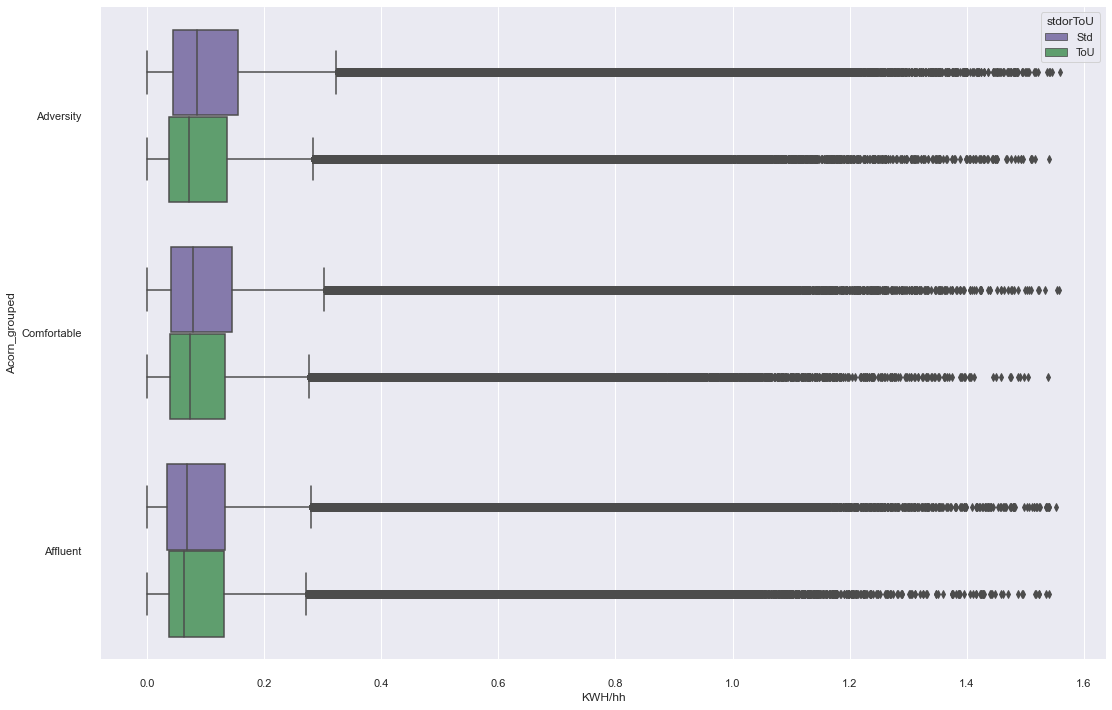

In [13]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x='KWH/hh', y='Acorn_grouped',
            hue="stdorToU", palette=["m", "g", "b"],
            data=df8_less_99th) 
sns.despine(offset=10, trim=True)

In [14]:
gb7 = df7_99th.groupby(['Acorn_grouped', 'stdorToU']) # group by to do more EDA.
(gb7.size()/17580).round(0) # how many series belong to each group.

Acorn_grouped  stdorToU
Adversity      Std         168.0
               ToU          37.0
Affluent       Std         265.0
               ToU          77.0
Comfortable    Std         183.0
               ToU          47.0
dtype: float64

In [17]:
arr1 = list(df7_99th['LCLid'].unique())
arr2 = list(df8_less_99th['LCLid'].unique())

In [27]:
df['Is_in_99th_percentile'] = df['LCLid'].apply(lambda x: any([k in x for k in arr1]))

In [28]:
df

,DateTime,LCLid,stdorToU,KWH/hh,Acorn,Acorn_grouped,Day,air_temperature,Month,Is_in_99th_percentile
0,2013-01-01 00:00:00,MAC000002,Std,0.219,ACORN-A,Affluent,Tuesday,48.02,January,True
1,2013-01-01 00:30:00,MAC000002,Std,0.241,ACORN-A,Affluent,Tuesday,47.84,January,True
2,2013-01-01 01:00:00,MAC000002,Std,0.191,ACORN-A,Affluent,Tuesday,47.66,January,True
3,2013-01-01 01:30:00,MAC000002,Std,0.235,ACORN-A,Affluent,Tuesday,47.39,January,True
4,2013-01-01 02:00:00,MAC000002,Std,0.182,ACORN-A,Affluent,Tuesday,47.12,January,True
...,...,...,...,...,...,...,...,...,...,...
19654435,2014-01-01 21:30:00,MAC004219,Std,0.266,ACORN-E,Affluent,Wednesday,42.80,January,False
19654436,2014-01-01 22:00:00,MAC004219,Std,0.260,ACORN-E,Affluent,Wednesday,42.80,January,False
19654437,2014-01-01 22:30:00,MAC004219,Std,0.301,ACORN-E,Affluent,Wednesday,42.80,January,False
19654438,2014-01-01 23:00:00,MAC004219,Std,0.223,ACORN-E,Affluent,Wednesday,42.80,January,False


In [31]:
df.to_csv("C:\\Users\\jesse\\Downloads\\clases\\electrical data\\london data\\data\\peak\\99th_df.csv", index = False) # full dataset